<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/NLP_A_2_Assess_Clustering_and_Classification_Outputs_Google_Colab_Notebook_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 02 - Classification and Clustering

Clustering methods compute a similarity (or closeness) measure, such as Euclidean distance, in order to decide whether two documents are ‘similar’ or not.  

Use the entire class corpus and do sentiment analysis for the positive and negative reviews.

Topic modeling is another way to group ‘similar’ documents into ‘clusters’. 

### Importing Packages

In [1]:
import pandas as pd
import os
import random
import numpy as np
import pickle 
import re,string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import model_selection
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora
from gensim.models import LsiModel,LdaModel



from sklearn.metrics import precision_recall_fscore_support , recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora
from gensim.models import LsiModel,LdaModel
from sklearn.preprocessing import StandardScaler, RobustScaler


In [2]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Mount Google Drive to Colab Environment

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
folder_path='/content/drive/My Drive/Colab_Notebooks/MSDS-453/'
folder_path
print('\n')
output_dir =folder_path+"output data/TFIDF_output"
output_dir



'/content/drive/My Drive/Colab_Notebooks/MSDS-453/'

'/content/drive/My Drive/Colab_Notebooks/MSDS-453/output data/TFIDF_output'

### Functions Create TFIDF and Doc2vec Matrices

In [7]:
#stop_words = set(stopwords.words('english'))

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['the','get','co','am','of','to', 'too','in','that','film','movie','as','from','and','her','at','2021','2013','dont', 
                'theyre', 'theres', 'theyll', 'doesnt' , 'im', 'sorry','flick','movies','films','FALSE','TRUE']
stopwords.extend(newStopWords)

#Removing duplicate stop words
def Remove(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list
     
stop_words_final = Remove(stopwords)
print(stop_words_final)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
def remove_stop_words(in_text):
    #stop_words = set(stopwords.words('english')) 
    stop_words = set(stop_words_final)
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return filtered_sentence


def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

In [9]:
def clean_doc(doc): 
    #split document into individual words
    #doc = ' '.join(remove_stop_words(doc))
    #doc = apply_lemmatization(doc)

    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]

    # filter out stop words
    #stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words_final]

    # word stemming    
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    
    return tokens



def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc


In [10]:
def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range=(1,1))

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

### Latent Semantic Analysis, Allocation, Word2Vec Matrix 
1. Latent Semantic Analysis Example
2. Latent Dirichlet Allocation
3. Word2Vec Matrix creation

### Latent Semantic Analysis Using Gensim's Implementation

In [11]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    index = similarities.MatrixSimilarity(lsamodel[doc_term_matrix])

    return lsamodel,dictionary,index

### Latent Semantic Analysis Example

In [12]:
def lsa(tfidf_matrix, terms, n_components = 10):
    #this is a function to execute lsa.  inputs to the function include the tfidf matrix and
    #the desired number of components.
    
    LSA = TruncatedSVD(n_components=10)

    LSA.fit(tfidf_matrix)


    for i, comp in enumerate(LSA.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        print("Topic "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])

### Latent Dirichlet Allocation

In [13]:
def lda(tfidf_matrix, terms, topics = 3, num_words = 10):
    #this is a function to perform lda on the tfidf matrix.  function varibales include:
    #tfidf matrix, desired number of topic, and number of words per topic.

    topics = 3
    num_words = 10
    lda = LatentDirichletAllocation(n_components=topics).fit(tfidf_matrix)

    topic_dict = {}
    for topic_num, topic in enumerate(lda.components_):
        topic_dict[topic_num] = " ".join([terms[i]for i in topic.argsort()[:-num_words - 1:-1]])

    print(topic_dict)

### Word2Vec Matrix Generation

In [14]:
def word2vec(processed_text, size = 100):
    #This is a function to generate the word2vec matrix. Input parameters include the 
    #tokenized text and matrix size
    
    #word to vec
    model_w2v = Word2Vec(processed_text, size=100, window=5, min_count=1, workers=4)

    #join all processed DSI words into single list
    processed_text_w2v=[]
    for i in processed_text:
        for k in i:
            processed_text_w2v.append(k)

    #obtian all the unique words from DSI
    w2v_words=list(set(processed_text_w2v))

    #can also use the get_feature_names() from TFIDF to get the list of words
    #w2v_words=Tfidf.get_feature_names()

    #empty dictionary to store words with vectors
    w2v_vectors={}

    #for loop to obtain weights for each word
    for i in w2v_words:
        temp_vec=model_w2v.wv[i]
        w2v_vectors[i]=temp_vec

    #create a final dataframe to view word vectors
    w2v_df=pd.DataFrame(w2v_vectors).transpose()
    print(w2v_df)
    return w2v_df


#### Section of Code Prepares the Required Variables for Functions 

In [15]:
#read in class corpus csv into python
data=pd.read_csv(r'/content/drive/My Drive/Colab_Notebooks/MSDS-453/MSDS453_Sec57_ClassCorpus_v4.csv')

#data='/content/drive/My Drive/Colab_Notebooks/MSDS-453/MSDS453_Sec57_ClassCorpus_v2.csv'


#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['DSI_Title'].tolist()
processed_text = data['processed_text'].tolist()


### Plot the LSA based on user defined number of topics and words

In [16]:
def plot_lsa(number_of_topics, words):

    ######################################
    #Function to plot the LSA based on user defined number of topics and words
    #EXPERIMENT WITH THESE PARAMETERS topics and words

    #####################################
    model,dictionary,index=create_gensim_lsa_model(processed_text,number_of_topics,words)

    for doc in processed_text:
        vec_bow = dictionary.doc2bow(doc)
        vec_lsi = model[vec_bow]  # convert the query to LSI space
        sims = index[vec_lsi] # perform a similarity query against the corpus

    fig, ax = plt.subplots(figsize=(30, 10))
    cax = ax.matshow(index, interpolation='nearest')
    ax.grid(True)
    plt.xticks(range(len(processed_text)), titles, rotation=90);
    plt.yticks(range(len(processed_text)), titles);
    fig.colorbar(cax)
    plt.show()
    return model
    

### Plotting 6 topics and 10 words

[(0, '0.202*"charact" + 0.174*"stori" + 0.151*"first" + 0.134*"play" + 0.129*"thing" + 0.126*"famili" + 0.121*"make" + 0.109*"scene" + 0.108*"would" + 0.107*"anoth"'), (1, '0.586*"cruella" + -0.279*"nolan" + -0.237*"interstellar" + -0.199*"space" + 0.147*"baro" + 0.144*"charact" + 0.129*"estella" + 0.117*"villain" + 0.109*"dalmatian" + 0.108*"disney"'), (2, '0.423*"cruella" + 0.278*"nolan" + -0.249*"harri" + 0.248*"interstellar" + 0.196*"space" + -0.151*"spiderman" + -0.126*"peter" + -0.124*"horror" + -0.113*"eastwood" + 0.112*"cooper"'), (3, '0.270*"harri" + -0.265*"famili" + -0.223*"horror" + 0.171*"spiderman" + 0.168*"action" + -0.144*"watch" + -0.134*"stori" + 0.128*"eastwood" + -0.123*"videotap" + 0.119*"reynold"'), (4, '-0.306*"harri" + 0.286*"johnson" + 0.263*"reynold" + -0.249*"spiderman" + 0.229*"notic" + -0.212*"peter" + 0.184*"gadot" + 0.182*"booth" + 0.167*"hartley" + -0.136*"eastwood"'), (5, '0.374*"harri" + -0.239*"famili" + 0.215*"eastwood" + -0.196*"spiderman" + 0.170*"

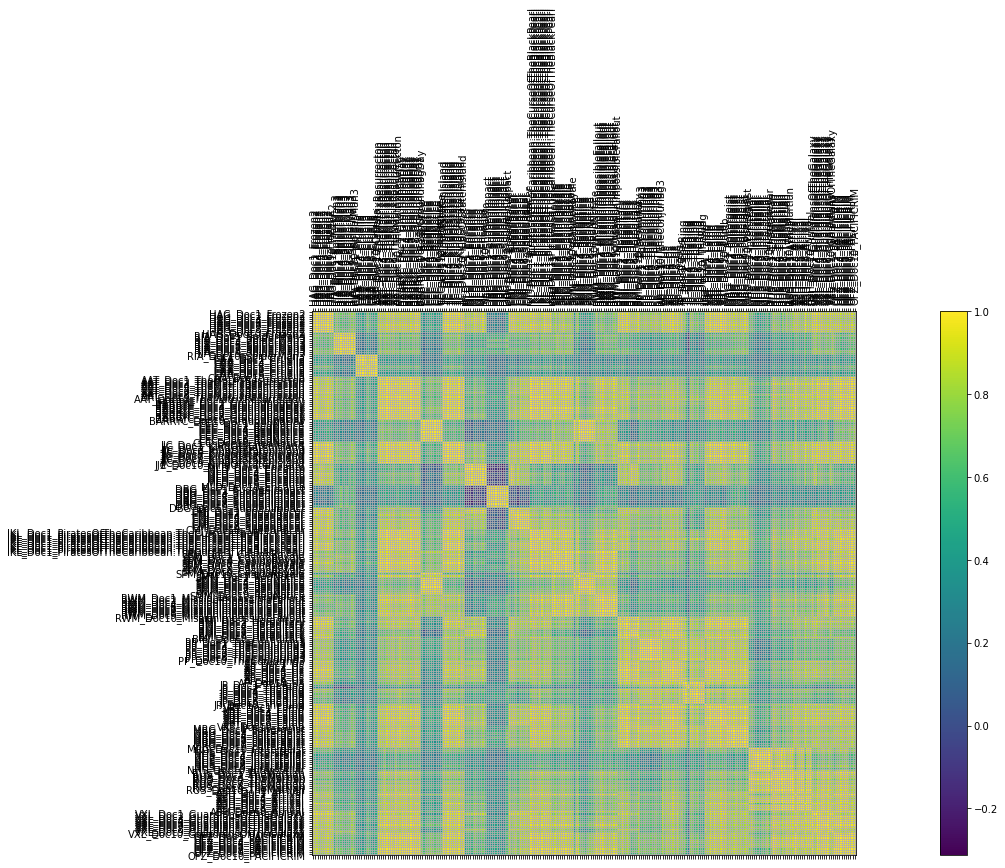

In [17]:
model_6topic_10words = plot_lsa(6, 10)

### Plotting 4 topics and 10 words

[(0, '0.202*"charact" + 0.174*"stori" + 0.151*"first" + 0.134*"play" + 0.129*"thing" + 0.126*"famili" + 0.121*"make" + 0.109*"scene" + 0.108*"would" + 0.107*"anoth"'), (1, '-0.586*"cruella" + 0.279*"nolan" + 0.237*"interstellar" + 0.199*"space" + -0.147*"baro" + -0.144*"charact" + -0.129*"estella" + -0.117*"villain" + -0.109*"dalmatian" + -0.108*"disney"'), (2, '0.423*"cruella" + 0.278*"nolan" + -0.249*"harri" + 0.248*"interstellar" + 0.196*"space" + -0.151*"spiderman" + -0.126*"peter" + -0.124*"horror" + -0.113*"eastwood" + 0.112*"cooper"'), (3, '-0.270*"harri" + 0.265*"famili" + 0.222*"horror" + -0.171*"spiderman" + -0.168*"action" + 0.144*"watch" + 0.134*"stori" + -0.128*"eastwood" + 0.123*"videotap" + -0.119*"reynold"')]


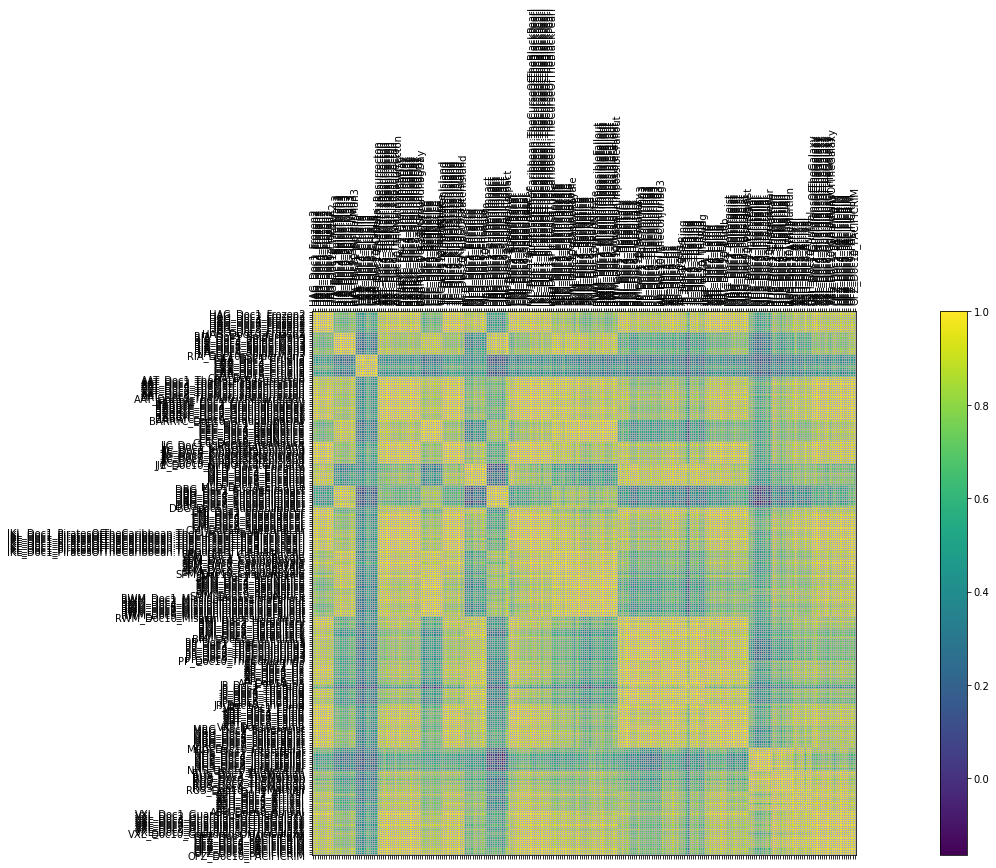

In [18]:
model_4topic_10words = plot_lsa(4, 10)

### Plotting 10 topics and 20 words

[(0, '0.202*"charact" + 0.174*"stori" + 0.151*"first" + 0.134*"play" + 0.129*"thing" + 0.126*"famili" + 0.121*"make" + 0.109*"scene" + 0.108*"would" + 0.107*"anoth" + 0.103*"action" + 0.102*"world" + 0.101*"cruella" + 0.100*"never" + 0.098*"becom" + 0.097*"littl" + 0.097*"someth" + 0.094*"peopl" + 0.092*"nolan" + 0.090*"still"'), (1, '0.586*"cruella" + -0.279*"nolan" + -0.237*"interstellar" + -0.199*"space" + 0.147*"baro" + 0.144*"charact" + 0.129*"estella" + 0.117*"villain" + 0.109*"dalmatian" + 0.108*"disney" + -0.107*"cooper" + -0.106*"planet" + 0.105*"stone" + 0.105*"fashion" + 0.104*"stori" + 0.093*"design" + -0.091*"human" + 0.088*"thompson" + -0.087*"earth" + -0.082*"mission"'), (2, '0.423*"cruella" + 0.278*"nolan" + -0.249*"harri" + 0.248*"interstellar" + 0.196*"space" + -0.151*"spiderman" + -0.126*"peter" + -0.124*"horror" + -0.113*"eastwood" + 0.112*"cooper" + 0.107*"planet" + 0.104*"baro" + 0.091*"estella" + -0.090*"dirti" + -0.090*"warren" + 0.085*"earth" + -0.081*"raimi" +

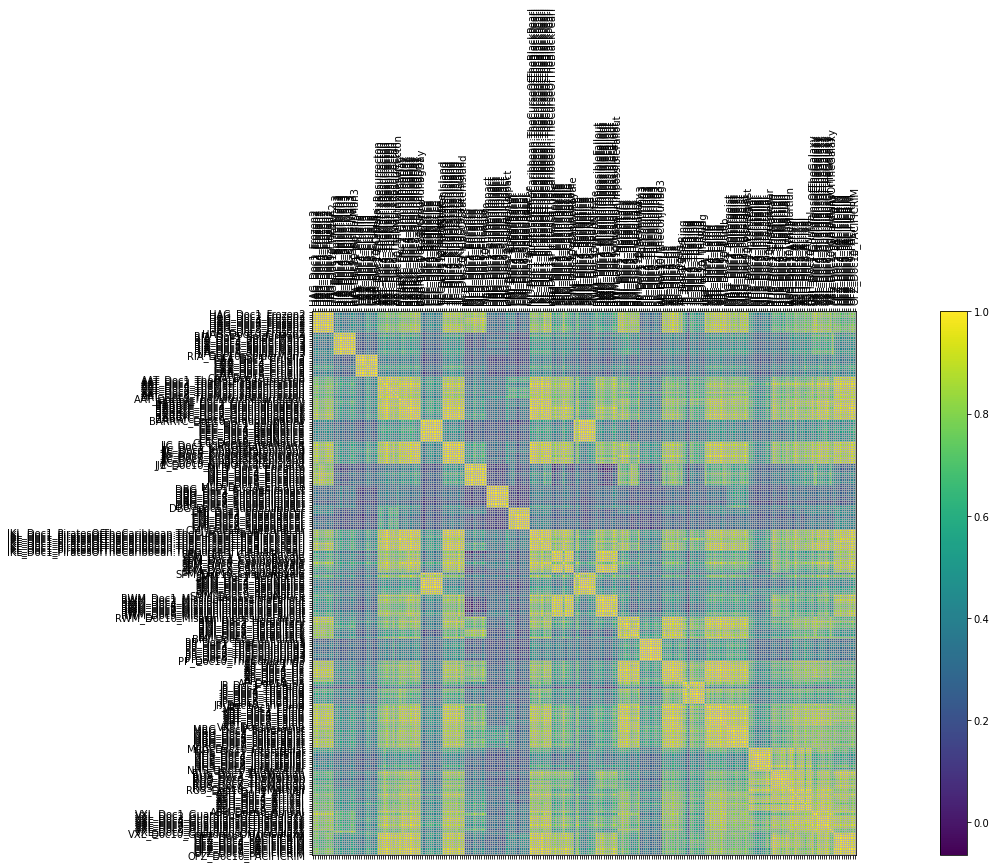

In [19]:
model_2topic_10words = plot_lsa(10, 20)

### Plotting 20 topics and 10 words

[(0, '0.202*"charact" + 0.174*"stori" + 0.151*"first" + 0.134*"play" + 0.129*"thing" + 0.126*"famili" + 0.121*"make" + 0.109*"scene" + 0.108*"would" + 0.107*"anoth"'), (1, '0.586*"cruella" + -0.279*"nolan" + -0.237*"interstellar" + -0.199*"space" + 0.147*"baro" + 0.144*"charact" + 0.129*"estella" + 0.117*"villain" + 0.109*"dalmatian" + 0.108*"disney"'), (2, '0.423*"cruella" + 0.278*"nolan" + -0.249*"harri" + 0.248*"interstellar" + 0.196*"space" + -0.151*"spiderman" + -0.126*"peter" + -0.124*"horror" + -0.113*"eastwood" + 0.112*"cooper"'), (3, '0.270*"harri" + -0.265*"famili" + -0.223*"horror" + 0.171*"spiderman" + 0.168*"action" + -0.144*"watch" + -0.134*"stori" + 0.128*"eastwood" + -0.123*"videotap" + 0.119*"reynold"'), (4, '0.306*"harri" + -0.286*"johnson" + -0.263*"reynold" + 0.249*"spiderman" + -0.229*"notic" + 0.211*"peter" + -0.184*"gadot" + -0.182*"booth" + -0.167*"hartley" + 0.136*"eastwood"'), (5, '0.374*"harri" + -0.239*"famili" + 0.215*"eastwood" + -0.196*"spiderman" + 0.170

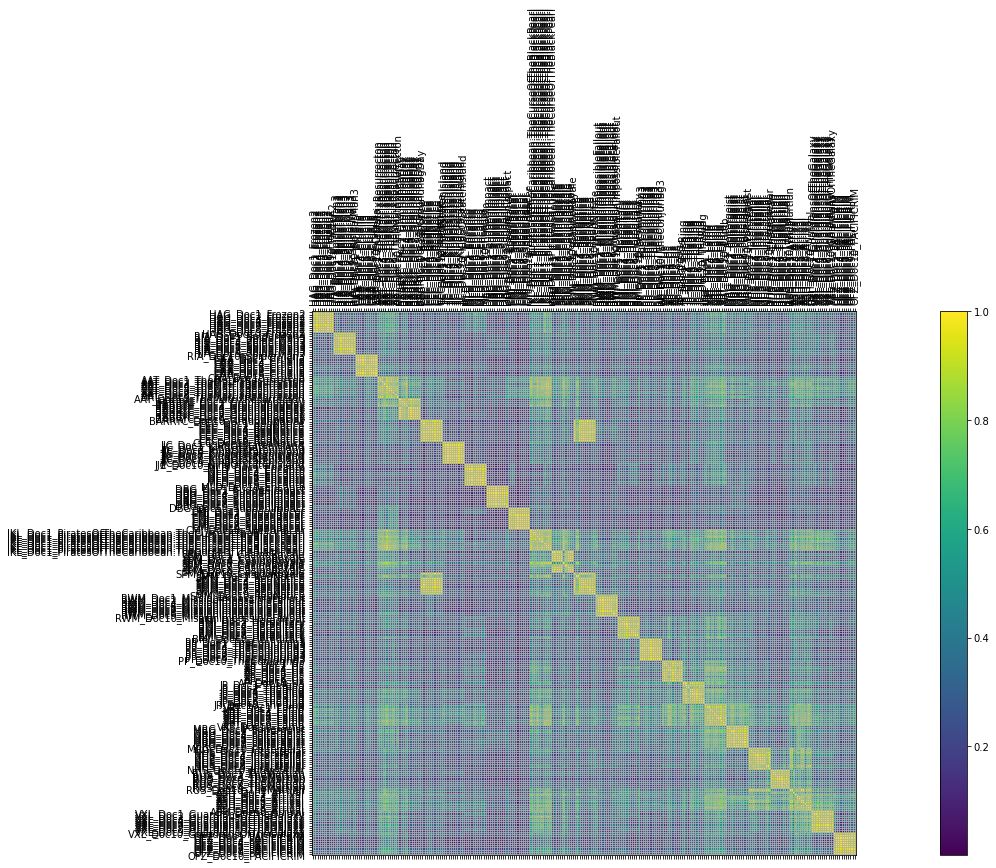

In [20]:
model_20topic_10words =plot_lsa(20, 10)

### Compare LSA Model Coherence

In [21]:
topics = [6, 2, 10, 4]
coherence_values = []
for t in topics:
    lsamodel,dictionary,index = create_gensim_lsa_model(processed_text,t,10)


    coherence_model_lsa = CoherenceModel(model=lsamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_values.append(coherence_lsa)

    
coherence ={'6 topic 10 words':coherence_values[0],
           '2 topic 10 words': coherence_values[1],
           '20 topic 10 words':coherence_values[2],
           '4 topic 10 words':coherence_values[3]}   

print('\n',coherence, '\n')

[(0, '0.202*"charact" + 0.174*"stori" + 0.151*"first" + 0.134*"play" + 0.129*"thing" + 0.126*"famili" + 0.121*"make" + 0.109*"scene" + 0.108*"would" + 0.107*"anoth"'), (1, '-0.586*"cruella" + 0.279*"nolan" + 0.237*"interstellar" + 0.199*"space" + -0.147*"baro" + -0.144*"charact" + -0.129*"estella" + -0.117*"villain" + -0.109*"dalmatian" + -0.108*"disney"'), (2, '-0.423*"cruella" + -0.278*"nolan" + 0.249*"harri" + -0.248*"interstellar" + -0.196*"space" + 0.151*"spiderman" + 0.126*"peter" + 0.124*"horror" + 0.113*"eastwood" + -0.112*"cooper"'), (3, '-0.270*"harri" + 0.265*"famili" + 0.223*"horror" + -0.171*"spiderman" + -0.168*"action" + 0.144*"watch" + 0.134*"stori" + -0.128*"eastwood" + 0.123*"videotap" + -0.119*"reynold"'), (4, '0.306*"harri" + -0.286*"johnson" + -0.263*"reynold" + 0.249*"spiderman" + -0.229*"notic" + 0.211*"peter" + -0.184*"gadot" + -0.182*"booth" + -0.167*"hartley" + 0.136*"eastwood"'), (5, '-0.374*"harri" + 0.240*"famili" + -0.215*"eastwood" + 0.196*"spiderman" + -

### Latent Dirichlet Allocation Using Gensim's implementation

In [22]:
def create_gensim_lda_model(doc_clean,number_of_topics,words):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LSA model
    ldamodel = LdaModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    # train model
    print(ldamodel.print_topics(num_topics=number_of_topics, num_words=words))
    index = similarities.MatrixSimilarity(ldamodel[doc_term_matrix])
    return ldamodel,dictionary,index,doc_term_matrix

### Execute create_gensim_lda_model Function

[(0, '0.006*"charact" + 0.005*"play" + 0.004*"stori" + 0.003*"action" + 0.003*"littl" + 0.003*"make" + 0.003*"world" + 0.003*"space" + 0.003*"thing" + 0.003*"first" + 0.002*"could" + 0.002*"watch" + 0.002*"famili" + 0.002*"would" + 0.002*"take" + 0.002*"anoth" + 0.002*"scene" + 0.002*"feel" + 0.002*"becom" + 0.002*"cruella"'), (1, '0.004*"charact" + 0.004*"harri" + 0.003*"stori" + 0.003*"cruella" + 0.003*"would" + 0.003*"play" + 0.003*"action" + 0.003*"make" + 0.003*"thing" + 0.003*"scene" + 0.003*"anoth" + 0.003*"think" + 0.002*"famili" + 0.002*"littl" + 0.002*"peopl" + 0.002*"realli" + 0.002*"becom" + 0.002*"first" + 0.002*"watch" + 0.002*"someth"'), (2, '0.004*"stori" + 0.003*"play" + 0.003*"world" + 0.003*"charact" + 0.003*"first" + 0.003*"make" + 0.002*"action" + 0.002*"famili" + 0.002*"thing" + 0.002*"never" + 0.002*"scene" + 0.002*"sequenc" + 0.002*"interstellar" + 0.002*"mission" + 0.002*"still" + 0.002*"becom" + 0.002*"human" + 0.002*"anoth" + 0.002*"space" + 0.002*"nolan"'), 

([<matplotlib.axis.XTick at 0x7fd328f766d0>,
 [Text(0, 1, 'HAG_Doc1_Frozen2'),
  Text(0, 1, 'HAG_Doc2_Frozen2'),
  Text(0, 1, 'HAG_Doc3_Frozen2'),
  Text(0, 1, 'HAG_Doc4_Frozen2'),
  Text(0, 1, 'HAG_Doc5_Frozen2'),
  Text(0, 1, 'HAG_Doc6_Frozen2'),
  Text(0, 1, 'HAG_Doc7_Frozen2'),
  Text(0, 1, 'HAG_Doc8_Frozen2'),
  Text(0, 1, 'HAG_Doc9_Frozen2'),
  Text(0, 1, 'HAG_Doc10_Frozen2'),
  Text(0, 1, 'RIA_Doc1_SpiderMan3'),
  Text(0, 1, 'RIA_Doc2_SpiderMan3'),
  Text(0, 1, 'RIA_Doc3_SpiderMan3'),
  Text(0, 1, 'RIA_Doc4_SpiderMan3'),
  Text(0, 1, 'RIA_Doc5_SpiderMan3'),
  Text(0, 1, 'RIA_Doc6_SpiderMan3'),
  Text(0, 1, 'RIA_Doc7_SpiderMan3'),
  Text(0, 1, 'RIA_Doc8_SpiderMan3'),
  Text(0, 1, 'RIA_Doc9_SpiderMan3'),
  Text(0, 1, 'RIA_Doc10_SpiderMan3'),
  Text(0, 1, 'CAA_Doc1_Cruella'),
  Text(0, 1, 'CAA_Doc2_Cruella'),
  Text(0, 1, 'CAA_Doc3_Cruella'),
  Text(0, 1, 'CAA_Doc4_Cruella'),
  Text(0, 1, 'CAA_Doc5_Cruella'),
  Text(0, 1, 'CAA_Doc6_Cruella'),
  Text(0, 1, 'CAA_Doc7_Cruella'),
  Tex

([<matplotlib.axis.YTick at 0x7fd32af723d0>,
 [Text(0, 0, 'HAG_Doc1_Frozen2'),
  Text(0, 0, 'HAG_Doc2_Frozen2'),
  Text(0, 0, 'HAG_Doc3_Frozen2'),
  Text(0, 0, 'HAG_Doc4_Frozen2'),
  Text(0, 0, 'HAG_Doc5_Frozen2'),
  Text(0, 0, 'HAG_Doc6_Frozen2'),
  Text(0, 0, 'HAG_Doc7_Frozen2'),
  Text(0, 0, 'HAG_Doc8_Frozen2'),
  Text(0, 0, 'HAG_Doc9_Frozen2'),
  Text(0, 0, 'HAG_Doc10_Frozen2'),
  Text(0, 0, 'RIA_Doc1_SpiderMan3'),
  Text(0, 0, 'RIA_Doc2_SpiderMan3'),
  Text(0, 0, 'RIA_Doc3_SpiderMan3'),
  Text(0, 0, 'RIA_Doc4_SpiderMan3'),
  Text(0, 0, 'RIA_Doc5_SpiderMan3'),
  Text(0, 0, 'RIA_Doc6_SpiderMan3'),
  Text(0, 0, 'RIA_Doc7_SpiderMan3'),
  Text(0, 0, 'RIA_Doc8_SpiderMan3'),
  Text(0, 0, 'RIA_Doc9_SpiderMan3'),
  Text(0, 0, 'RIA_Doc10_SpiderMan3'),
  Text(0, 0, 'CAA_Doc1_Cruella'),
  Text(0, 0, 'CAA_Doc2_Cruella'),
  Text(0, 0, 'CAA_Doc3_Cruella'),
  Text(0, 0, 'CAA_Doc4_Cruella'),
  Text(0, 0, 'CAA_Doc5_Cruella'),
  Text(0, 0, 'CAA_Doc6_Cruella'),
  Text(0, 0, 'CAA_Doc7_Cruella'),
  Tex

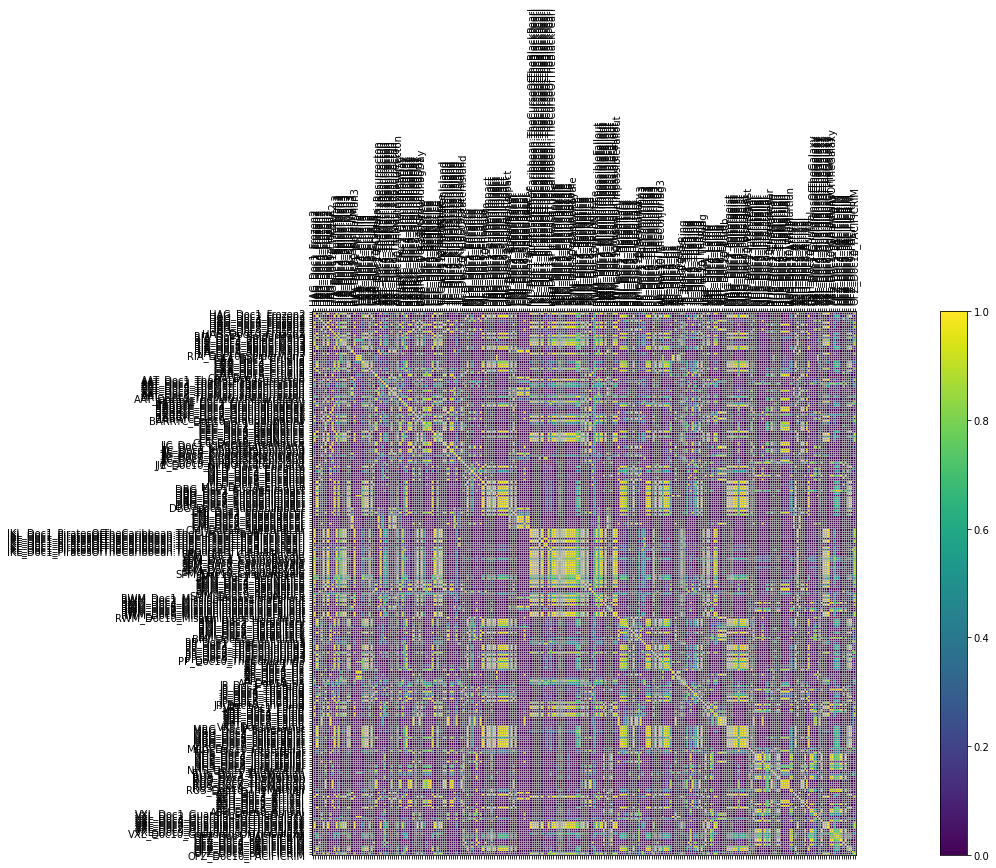

In [23]:
######################################
#EXPERIMENT WITH THESE PARAMETERS
number_of_topics=10
words=20
#####################################
model2,dictionary2,index2,doctermmatrix2=create_gensim_lda_model( processed_text,number_of_topics,words)

for doc in processed_text:
    vec_bow2 = dictionary2.doc2bow(doc)
    vec2 = model2[vec_bow2]  # convert the query to embedded space
    sims2 = index2[vec2]  # perform a similarity query against the corpus
    #print(list(enumerate(sims2)))  

fig, ax = plt.subplots(figsize=(30, 10))
cax = ax.matshow(index2, interpolation='nearest')
ax.grid(True)
plt.xticks(range(len(processed_text)), titles, rotation=90);
plt.yticks(range(len(processed_text)), titles);
fig.colorbar(cax)
plt.show()

### Compare LDA Model Coherence

In [208]:
topics = [6, 2, 10, 4]
coherence_values = []
for t in topics:
    ldamodel,dictionary,index, matrix = create_gensim_lda_model(processed_text,t,20)


    coherence_model_lda = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    
coherence ={'6 topic 10 words':coherence_values[0],
           '2 topic 10 words': coherence_values[1],
           '20 topic 10 words':coherence_values[2],
            '4 topic 10 words':coherence_values[3]}   

print(coherence)

[(0, '0.005*"charact" + 0.004*"famili" + 0.004*"stori" + 0.003*"play" + 0.003*"first" + 0.003*"scene" + 0.003*"still" + 0.003*"littl" + 0.003*"audienc" + 0.002*"origin" + 0.002*"never" + 0.002*"watch" + 0.002*"thing" + 0.002*"feel" + 0.002*"make" + 0.002*"speed" + 0.002*"anim" + 0.002*"someth" + 0.002*"world" + 0.002*"effect"'), (1, '0.004*"stori" + 0.004*"charact" + 0.004*"famili" + 0.004*"anoth" + 0.003*"thing" + 0.003*"first" + 0.003*"becom" + 0.003*"play" + 0.003*"speed" + 0.003*"action" + 0.003*"feel" + 0.003*"world" + 0.002*"make" + 0.002*"human" + 0.002*"horror" + 0.002*"audienc" + 0.002*"watch" + 0.002*"start" + 0.002*"scene" + 0.002*"director"'), (2, '0.004*"first" + 0.004*"stori" + 0.003*"play" + 0.003*"make" + 0.003*"charact" + 0.003*"world" + 0.003*"would" + 0.003*"scene" + 0.002*"action" + 0.002*"cruella" + 0.002*"thing" + 0.002*"audienc" + 0.002*"could" + 0.002*"littl" + 0.002*"great" + 0.002*"still" + 0.002*"someth" + 0.002*"never" + 0.002*"anoth" + 0.002*"famili"'), (3,

### Demonstrate the following supervised/unsupervised learning methods:
1. K-Means Clustering (Unsupervised)
2. Support Vector Machines (SVMs) (Supervised)
3. (Multinomial) Naïve Bayes (MultinomialNB) (Supervised)
4. Logistic Regression (Supervised)

### Functions Process Text and Create the Required TFIDF and Doc2vec Matrices

In [25]:
#functions used to 
def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    #stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words_final]         
    # word stemming    
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    return tokens


def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range= ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix


def One_Hot(variable):
    #this is a function to one hot encode the classes
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels



### Dataframe Store the Processed Text and Tokenized text

In [26]:
#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['DSI_Title'].tolist()
processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles, ngram_range = (1,1))


In [27]:
tfidf_matrix.head()

abandon  abash  abbey  abduct  abdulmateen  abel  aberr  abet  abhorr  abid      abil  abject  abkarian  abnett  abnorm  aboard  abod  abomin  abort  abound  aboveground  abovethetitl  abram  abrupt  abruptli  abscond  absenc  absent  absolut  absorb  abstract  abstrus  absurd  absurdli  abuela  abund  abus  abuzz  abym  abysmali  abyss  academ  academi  acceler  accent  accentu  accept  access  accessori  accid  accident  acclaim  accolad  accommod  accompani  accomplic  accomplish  accord  accordingli  account  accouter  accumul  accur  accurs     accus  accustom  acerb  ach  achiev  achil  achingli  acid  acidif  acidtak  acknowledg  acolyt  acquaint  acquir  acquisit  acquit  acr  acreag  acrobat    across  act  actat  actingwis    action  actionadventur  actioncomedi  actionmovi  actionpack  actionstar  actionwel  activ  activist  actor  actorcomedian  actorsi  actress    actual  acumen  acut   ad  adag  adam     adapt  adaptationit  adassa  addict  addit  \
HAG_Doc1_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.000000     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.000000        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.000000       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.000000  0.0    0.0        0.0  0.000000             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.000000    0.0            0.0      0.0      0.0  0.000000     0.0   0.0  0.0   0.0   0.0  0.000000           0.0     0.0     0.0    0.0   
HAG_Doc2_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.000000     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.000000        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.000000       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.000000  0.0    0.0        0.0  0.051747             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.000000    0.0            0.0      0.0      0.0  0.000000     0.0   0.0  0.0   0.0   0.0  0.000000           0.0     0.0     0.0    0.0   
HAG_Doc3_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.027554     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.034481        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.034481       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.000000  0.0    0.0        0.0  0.015712             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.049787    0.0            0.0      0.0      0.0  0.017961     0.0   0.0  0.0   0.0   0.0  0.026103           0.0     0.0     0.0    0.0   
HAG_Doc4_Frozen2      0.0    0.0  

### K-Means

In [28]:
def k_means(titles, tfidf_matrix, k=3):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    #Returns dataframe indicating cluster number per document

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])
    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list

    return cluster_title,clusters,frame



#### Implementation of Silhouette Score 
Measurement most optimal number of clusters

In [145]:
k_list = [3, 5, 7,9,11,13,15,17,19,21,23,25, 29, 33]

#silhoutte score list
k_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix, labels)
    k_scores.append(score)

KMeans(n_clusters=3, random_state=89)

KMeans(n_clusters=5, random_state=89)

KMeans(n_clusters=7, random_state=89)

KMeans(n_clusters=9, random_state=89)

KMeans(n_clusters=11, random_state=89)

KMeans(n_clusters=13, random_state=89)

KMeans(n_clusters=15, random_state=89)

KMeans(n_clusters=17, random_state=89)

KMeans(n_clusters=19, random_state=89)

KMeans(n_clusters=21, random_state=89)

KMeans(n_clusters=23, random_state=89)

KMeans(n_clusters=25, random_state=89)

KMeans(n_clusters=29, random_state=89)

KMeans(n_clusters=33, random_state=89)

#### Plot Silhouette Scores

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'clusters')

Text(0, 0.5, 'sillhouette score')

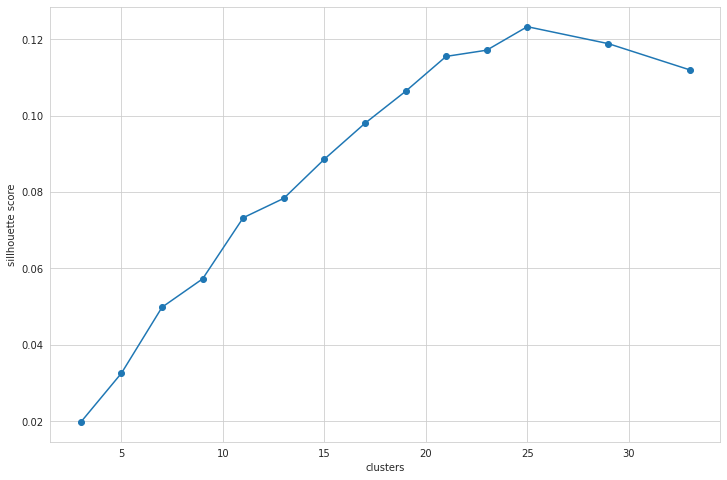

In [146]:
plt.figure(figsize=(12, 8))
plt.scatter(k_list, k_scores)
plt.plot(k_list, k_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

In [31]:
cluster_title,clusters,k_means_df = k_means(titles, tfidf_matrix, k =24)

#### Explore K-means clustering of TFIDF matrix


In [147]:
#############################################
#Calculates tf idf
#Edit ngram range if you like
#############################################
def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(stop_words='english', ngram_range = ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

#############################################
#Performs the k-means clustering of the tfidf matrix
#Edit the number of clusters
#############################################
def k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=10):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles
        

#############################################
# Run the code
#############################################
tfidf_matrix, terms = tfidf(final_processed_text, titles)
k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=25)

Top terms per cluster:
Cluster 0:
 interstellar
 nolan
 cooper
 space
 mcconaughey
 scienc
 murphi
 earth
 planet
 wormhol
Cluster 0 titles: NHS_Doc1_Interstellar, NHS_Doc2_Interstellar, NHS_Doc3_Interstellar, NHS_Doc4_Interstellar, NHS_Doc5_Interstellar, NHS_Doc6_Interstellar, NHS_Doc7_Interstellar, NHS_Doc8_Interstellar, NHS_Doc9_Interstellar, NHS_Doc10_Interstellar, ASH_Doc2_Arrival,Cluster 1:
 reynold
 johnson
 notic
 gadot
 booth
 netflix
 hartley
 thief
 dwayn
 action
Cluster 1 titles: CEC_Doc2_RedNotice, CEC_Doc4_RedNotice, CEC_Doc5_RedNotice, CEC_Doc6_RedNotice, CEC_Doc7_RedNotice, CEC_Doc8_RedNotice, CEC_Doc9_RedNotice, CEC_Doc10_RedNotice, SMM_Doc1_RedNotice, SMM_Doc2_RedNotice, SMM_Doc3_RedNotice, SMM_Doc5_RedNotice, SMM_Doc6_RedNotice,Cluster 2:
 rachel
 verbinski
 watt
 video
 watch
 videotap
 naomi
 horror
 henderson
 aidan
Cluster 2 titles: JP_Doc1_TheRing, JP_Doc2_TheRing, JP_Doc3_TheRing, JP_Doc4_TheRing, JP_Doc5_TheRing, JP_Doc6_TheRing, JP_Doc7_TheRing, JP_Doc8_TheRi

### Explore K-means clustering of doc2vec matrix

In [154]:
def doc2vec_with_titles(corpus, processed_text, titles, vector_size = 300):
    #function to created doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

    model = Doc2Vec(documents, vector_size=300, window=3, min_count=2, workers=4)

    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

    doc2vec_df=doc2vec_df.reset_index()

    doc_titles={'title': titles}
    t=pd.DataFrame(doc_titles)

    doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

    doc2vec_df=doc2vec_df.drop('index', axis=1)
    return doc2vec_df

def k_means_doc2vec(doc2vec_df, final_processed_text,titles, k = 5):
    
    #this is a funciton to create the k_means outputs using the doc2vec matrics.  Required inputs
    #include the doc2vec matrix, and desired number of clusters.
    doc2vec_k_means=doc2vec_df.drop('title', axis=1)

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(doc2vec_k_means)

    clusters_d2v = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        print("Cluster %d:" % i)
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            print(' %s ' % title, end='\n')
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list

doc2vec_model = doc2vec_with_titles(final_processed_text, processed_text,titles)
doc2vec_model.index = titles
k_means_doc2vec(doc2vec_model, final_processed_text,titles, k =15)

Cluster 0:
 AAT_Doc8_TheMatrixResurrecton 
 BARRYC_Doc10_GroundhogDay 
 JJC_Doc6_KingOfStatenIsland 
 CMJ_Doc8_SpeedRacer 
 BMI_Doc8_Hereditary 
 JP_Doc3_TheRing 
 VRT_Doc6_Lamb 
Cluster 1:
 HAG_Doc7_Frozen2 
 HAG_Doc9_Frozen2 
 RIA_Doc7_SpiderMan3 
 CAA_Doc4_Cruella 
 CAA_Doc9_Cruella 
 CAA_Doc10_Cruella 
 AAT_Doc4_TheMatrixResurrecton 
 AAT_Doc6_TheMatrixResurrecton 
 AAT_Doc9_TheMatrixResurrecton 
 BARRYC_Doc6_GroundhogDay 
 BARRYC_Doc9_GroundhogDay 
 CEC_Doc2_RedNotice 
 CEC_Doc4_RedNotice 
 JJC_Doc3_KingOfStatenIsland 
 JJC_Doc7_KingOfStatenIsland 
 JJC_Doc8_KingOfStatenIsland 
 MLD_Doc1_Encanto 
 MLD_Doc2_Encanto 
 MLD_Doc4_Encanto 
 MLD_Doc6_Encanto 
 MLD_Doc7_Encanto 
 DBG_Doc5_SuddenImpact 
 DBG_Doc7_SuddenImpact 
 CMJ_Doc2_SpeedRacer 
 CMJ_Doc5_SpeedRacer 
 CMJ_Doc9_SpeedRacer 
 IKL_Doc1_PiratesOfTheCaribbean:TheCurseOfTheBlackPearl 
 IKL_Doc1_PiratesOfTheCaribbean:TheCurseOfTheBlackPearl 
 IKL_Doc1_PiratesOfTheCaribbean:TheCurseOfTheBlackPearl 
 RWM_Doc7_MissionImpossibleFal

In [174]:
print(doc2vec_model)

                                                           0         1         2         3         4         5         6         7         8         9            10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27            28        29        30        31        32        33        34        35            36            37        38        39        40        41        42        43        44            45        46        47        48        49        50        51        52        53            54        55            56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74            75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90  \
HAG_

####  Identifying ideal number of clusters

In [162]:
k_list = [2, 5, 7, 10,12,15,17,20,25,30,35,40, 45, 47]
#silhoutte score list
sil_scores = []
doc2vec_k_means=doc2vec_model.drop('title', axis=1)

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(doc2vec_k_means)
    labels = km.labels_.tolist()
    score = silhouette_score(doc2vec_k_means, labels)
    sil_scores.append(score)

KMeans(n_clusters=2, random_state=89)

KMeans(n_clusters=5, random_state=89)

KMeans(n_clusters=7, random_state=89)

KMeans(n_clusters=10, random_state=89)

KMeans(n_clusters=12, random_state=89)

KMeans(n_clusters=15, random_state=89)

KMeans(n_clusters=17, random_state=89)

KMeans(n_clusters=20, random_state=89)

KMeans(n_clusters=25, random_state=89)

KMeans(n_clusters=30, random_state=89)

KMeans(n_clusters=35, random_state=89)

KMeans(n_clusters=40, random_state=89)

KMeans(n_clusters=45, random_state=89)

KMeans(n_clusters=47, random_state=89)

#### Plot Silhouette Scores

<Figure size 864x288 with 0 Axes>

Text(0.5, 0, 'clusters')

Text(0, 0.5, 'sillhouette score')

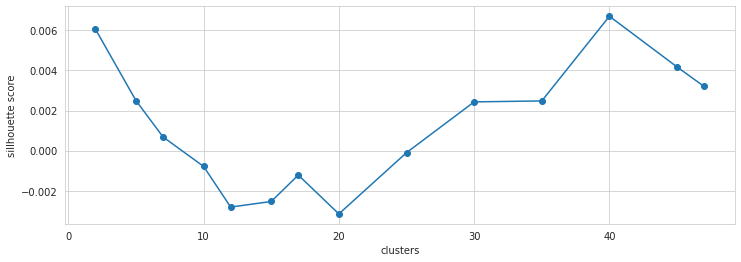

In [164]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

In [165]:
k_means_doc2vec(doc2vec_model, final_processed_text,titles, k =40)

Cluster 0:
 RIA_Doc1_SpiderMan3 
 PP_Doc4_TheConjuring3 
 MRG_Doc2_Poltergeist 
 ASH_Doc8_Arrival 
Cluster 1:
 HAG_Doc1_Frozen2 
 RIA_Doc7_SpiderMan3 
 MLD_Doc10_Encanto 
 DBG_Doc3_SuddenImpact 
 DBG_Doc6_SuddenImpact 
 IKL_Doc1_PiratesOfTheCaribbean:TheCurseOfTheBlackPearl 
 SPM_Doc8_CasinoRoyale 
 RWM_Doc10_MissionImpossibleFallout 
 MRG_Doc1_Poltergeist 
Cluster 2:
 HAG_Doc7_Frozen2 
 HAG_Doc10_Frozen2 
 RIA_Doc10_SpiderMan3 
 CAA_Doc6_Cruella 
 AAT_Doc6_TheMatrixResurrecton 
 AAT_Doc8_TheMatrixResurrecton 
 CEC_Doc6_RedNotice 
 JJC_Doc2_KingOfStatenIsland 
 IKL_Doc1_PiratesOfTheCaribbean:TheCurseOfTheBlackPearl 
 RWM_Doc8_MissionImpossibleFallout 
 BMI_Doc1_Hereditary 
 BMI_Doc4_Hereditary 
 ASH_Doc4_Arrival 
 VXL_Doc2_GuardiansOfTheGalaxy 
 OFZ_Doc1_PACIFICRIM 
 OFZ_Doc4_PACIFICRIM 
Cluster 3:
 HAG_Doc3_Frozen2 
 CEC_Doc1_RedNotice 
 CEC_Doc9_RedNotice 
 CEC_Doc10_RedNotice 
 SMM_Doc5_RedNotice 
Cluster 4:
 SPM_Doc2_CasinoRoyale 
 OFZ_Doc2_PACIFICRIM 
Cluster 5:
 RIA_Doc8_SpiderMa

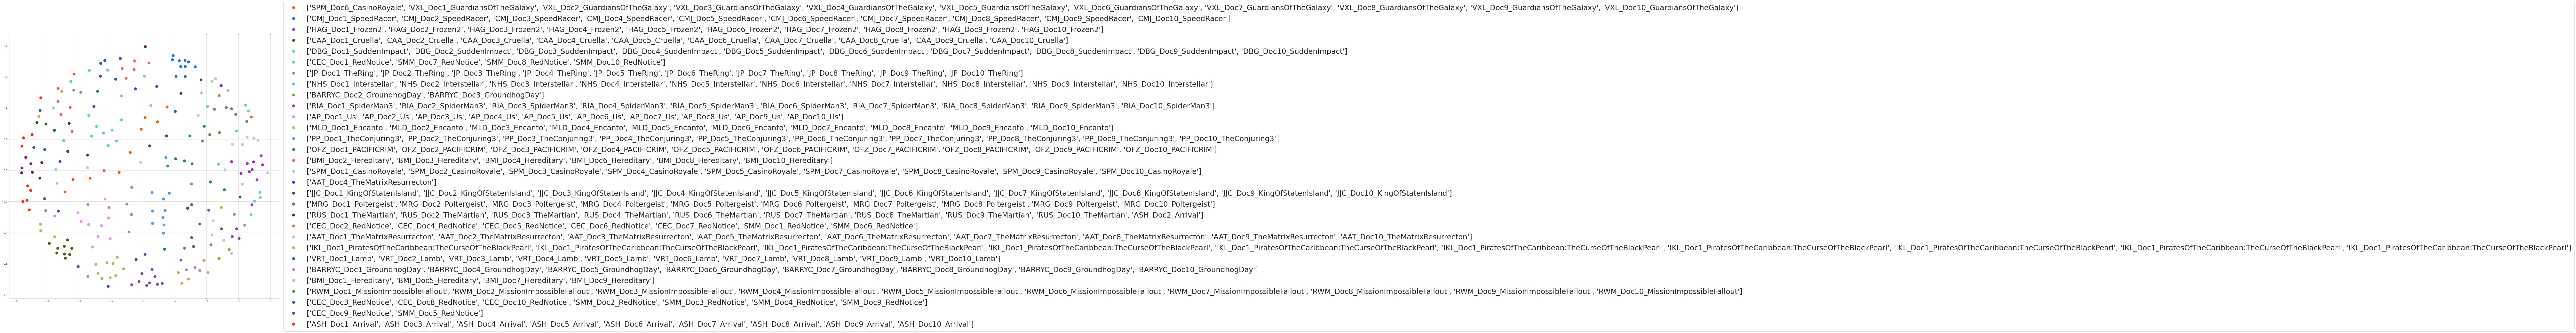

In [166]:
plot_tfidf_matrix(cluster_title,clusters,tfidf_matrix)

### Plot TFIDF Matrix

In [44]:
def plot_tfidf_matrix(cluster_title,clusters,TFIDF_matrix):
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.


    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    dist = 1 - cosine_similarity(TFIDF_matrix)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]


    #set up colors per clusters using a dict.  number of colors must correspond to K
    cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick', 
                      5:'red', 6:'darksalmon', 7:'sienna'}


    #set up cluster names using a dict.  
    cluster_dict=cluster_title

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

    #group by cluster
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(20,20)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
                label=cluster_dict[name], color=color, 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='on')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='on')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})      #show legend with only 1 point



### Functions Classifiers

In [45]:
def classifiers(x, y, model_type, cv = 3):
    
    #this function is to fit 3 different model scenarios.  Support vector machines, logistic regressions, naive bayes.
    #svm = Support vector machin
    #logistic = Logistic regression
    #naive_bayes = Naive Bayes Multinomial
    
    #can define cv value for cross validation.
    
    #function returns the train test split scores of each model.
    
    if model_type == 'svm':
        print("svm")
        model = SVC()

    elif model_type == 'logistic':
        print("logistic")
        model = LogisticRegression()

    elif model_type == 'naive_bayes':
        print("naive_bayes")
        model = MultinomialNB()
    
    elif model_type == 'randomforest':
        print("randomforest")
        model = RandomForestClassifier()

    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)

    
    predictions = model.predict(X_test)
    accy = accuracy_score(y_test, predictions)
    
    return accy

### Load Data For Analysis

In [46]:
#read in class corpus csv into python
data=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/MSDS-453/MSDS453_Sec57_ClassCorpus_v4.csv')
#'/content/drive/My Drive/Colab_Notebooks/MSDS-453/MSDS453_Sec57_ClassCorpus_v2.csv'

In [47]:
data.head(10)

Doc_ID          DSI_Title                                               Text Submission File Name Student Name Genre of Movie Review Type (pos or neg) Movie Title
0       0   HAG_Doc1_Frozen2  Parents, you can breathe a sigh of relief. Fro...     HAG_Doc1_Frozen2          HAG         Comedy                 Positive    Frozen_2
1       1   HAG_Doc2_Frozen2  Theyre back  the first Disney princesses to pe...     HAG_Doc2_Frozen2          HAG         Comedy                 Positive    Frozen_2
2       2   HAG_Doc3_Frozen2  Released in 2013 to a record-scorching $1.29 b...     HAG_Doc3_Frozen2          HAG         Comedy                 Positive    Frozen_2
3       3   HAG_Doc4_Frozen2  After the colossal success of Frozen, Disneys ...     HAG_Doc4_Frozen2          HAG         Comedy                 Positive    Frozen_2
4       4   HAG_Doc5_Frozen2  Animated adventure featuring the voices of Idi...     HAG_Doc5_Frozen2          HAG         Comedy                 Positive    Frozen_2
5       5   HAG_Doc6_Frozen2  Three weeks after Donald Trump was elected pre...     HAG_Doc6_Frozen2          HAG         Comedy                 Negative    Frozen_2
6       6   HAG_Doc7_Frozen2  We have seen it thousands of times in our live...     HAG_Doc7_Frozen2          HAG         Comedy                 Negative    Frozen_2
7       7   HAG_Doc8_Frozen2  Two thoughts occurred while watching the seque...     HAG_Doc8_Frozen2          HAG         Comedy                 Negative    Frozen_2
8       8   HAG_Doc9_Frozen2  Once upon a time, Disney sent its subpar seque...     HAG_Doc9_Frozen2          HAG         Comedy                 Negative    Frozen_2
9       9  HAG_Doc10_Frozen2  Elsa does not get a girlfriend in Frozen II, w...    HAG_Doc10_Frozen2          HAG         Comedy                 Negative    Frozen_2

In [92]:
#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))



#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['DSI_Title'].tolist()
processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles, ngram_range = (1,1))

### Clustering based on TF-IDF 

In [93]:
def k_means(titles, tfidf_matrix, k=3):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    #Returns dataframe indicating cluster number per document

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])
    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list

    return cluster_title,clusters,frame



In [95]:
tfidf_matrix, terms = tfidf(final_processed_text, titles, ngram_range = (1,1))

Identifying the ideal number of clusters 

### Access each cluster by changing the dictionary key value from 0 to k

In [96]:
k_list = [2, 5, 7, 10,12,15,17,20,25,30,35]
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix, labels)
    sil_scores.append(score)

KMeans(n_clusters=2, random_state=89)

KMeans(n_clusters=5, random_state=89)

KMeans(n_clusters=7, random_state=89)

KMeans(n_clusters=10, random_state=89)

KMeans(n_clusters=12, random_state=89)

KMeans(n_clusters=15, random_state=89)

KMeans(n_clusters=17, random_state=89)

KMeans(n_clusters=20, random_state=89)

KMeans(n_clusters=25, random_state=89)

KMeans(n_clusters=30, random_state=89)

KMeans(n_clusters=35, random_state=89)

<Figure size 864x288 with 0 Axes>

Text(0.5, 0, 'clusters')

Text(0, 0.5, 'sillhouette score')

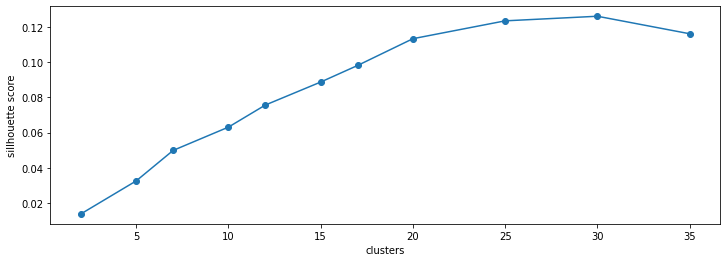

In [87]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

### Execute K-means Clustering

In [149]:
cluster_title, clusters, k_means_df = k_means(titles, tfidf_matrix, k =30)

In [150]:
cluster_title

{0: ['SPM_Doc6_CasinoRoyale',
  'VXL_Doc1_GuardiansOfTheGalaxy',
  'VXL_Doc2_GuardiansOfTheGalaxy',
  'VXL_Doc3_GuardiansOfTheGalaxy',
  'VXL_Doc4_GuardiansOfTheGalaxy',
  'VXL_Doc5_GuardiansOfTheGalaxy',
  'VXL_Doc6_GuardiansOfTheGalaxy',
  'VXL_Doc7_GuardiansOfTheGalaxy',
  'VXL_Doc8_GuardiansOfTheGalaxy',
  'VXL_Doc9_GuardiansOfTheGalaxy',
  'VXL_Doc10_GuardiansOfTheGalaxy'],
 1: ['CMJ_Doc1_SpeedRacer',
  'CMJ_Doc2_SpeedRacer',
  'CMJ_Doc3_SpeedRacer',
  'CMJ_Doc4_SpeedRacer',
  'CMJ_Doc5_SpeedRacer',
  'CMJ_Doc6_SpeedRacer',
  'CMJ_Doc7_SpeedRacer',
  'CMJ_Doc8_SpeedRacer',
  'CMJ_Doc9_SpeedRacer',
  'CMJ_Doc10_SpeedRacer'],
 2: ['HAG_Doc1_Frozen2',
  'HAG_Doc2_Frozen2',
  'HAG_Doc3_Frozen2',
  'HAG_Doc4_Frozen2',
  'HAG_Doc5_Frozen2',
  'HAG_Doc6_Frozen2',
  'HAG_Doc7_Frozen2',
  'HAG_Doc8_Frozen2',
  'HAG_Doc9_Frozen2',
  'HAG_Doc10_Frozen2'],
 3: ['CAA_Doc1_Cruella',
  'CAA_Doc2_Cruella',
  'CAA_Doc3_Cruella',
  'CAA_Doc4_Cruella',
  'CAA_Doc5_Cruella',
  'CAA_Doc6_Cruella',
  '

In [151]:

cluster_title[5]

['CEC_Doc1_RedNotice',
 'SMM_Doc7_RedNotice',
 'SMM_Doc8_RedNotice',
 'SMM_Doc10_RedNotice']

### Plot TFIDF Matrix

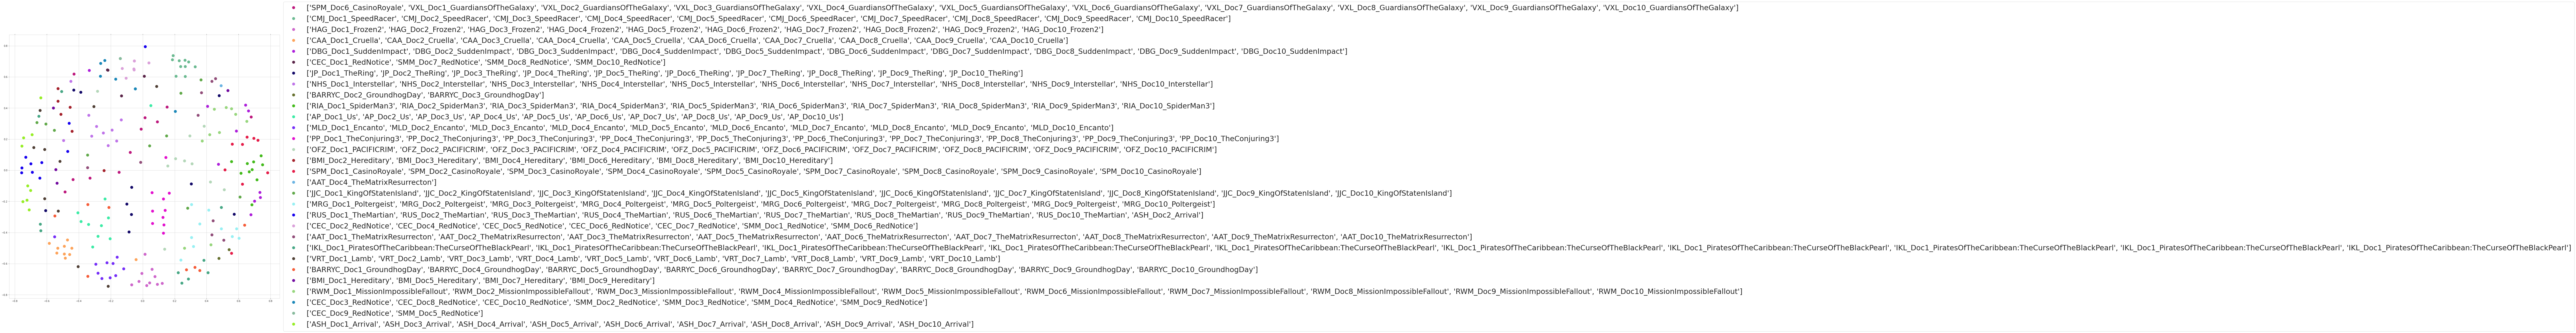

In [152]:
plot_tfidf_matrix(cluster_title,clusters,tfidf_matrix)

### Apply Labels 

In [180]:
labels = data['Review Type (pos or neg)'].apply(lambda x: 0 if x.lower().split(' ')[0] == 'negative' else 1)
print(labels)
type(labels)

0      1
1      1
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     1
15     0
16     0
17     0
18     0
19     0
20     1
21     1
22     0
23     0
24     0
25     1
26     0
27     1
28     1
29     0
30     0
31     0
32     0
33     0
34     0
35     1
36     1
37     1
38     1
39     1
40     0
41     0
42     0
43     0
44     0
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     0
57     0
58     0
59     0
60     1
61     1
62     1
63     1
64     1
65     0
66     0
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     1
76     1
77     1
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     0
97     0
98     0
99     0
100    1
101    1
102    1
103    1
104    1
105    0
106    0
107    0
108    0
109    0
110    1
1

pandas.core.series.Series

## Classification

### Train test split

In [181]:
tfidf_matrix.head()

abandon  abash  abbey  abduct  abdulmateen  abel  aberr  abet  abhorr  abid      abil  abject  abkarian  abnett  abnorm  aboard  abod  abomin  abort  abound  aboveground  abovethetitl  abram  abrupt  abruptli  abscond  absenc  absent  absolut  absorb  abstract  abstrus  absurd  absurdli  abuela  abund  abus  abuzz  abym  abysmali  abyss  academ  academi  acceler  accent  accentu  accept  access  accessori  accid  accident  acclaim  accolad  accommod  accompani  accomplic  accomplish  accord  accordingli  account  accouter  accumul  accur  accurs     accus  accustom  acerb  ach  achiev  achil  achingli  acid  acidif  acidtak  acknowledg  acolyt  acquaint  acquir  acquisit  acquit  acr  acreag  acrobat  act  actat  actingwis    action  actionadventur  actioncomedi  actionmovi  actionpack  actionstar  actionwel  activ  activist  actor  actorcomedian  actorsi  actress    actual  acumen  acut   ad  adag  adam     adapt  adaptationit  adassa  addict  addit  address  \
HAG_Doc1_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.000000     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.000000        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.000000       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.0    0.0        0.0  0.000000             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.000000    0.0            0.0      0.0      0.0  0.000000     0.0   0.0  0.0   0.0   0.0  0.000000           0.0     0.0     0.0    0.0      0.0   
HAG_Doc2_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.000000     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.000000        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.000000       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.0    0.0        0.0  0.052741             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.000000    0.0            0.0      0.0      0.0  0.000000     0.0   0.0  0.0   0.0   0.0  0.000000           0.0     0.0     0.0    0.0      0.0   
HAG_Doc3_Frozen2      0.0    0.0    0.0     0.0          0.0   0.0    0.0   0.0     0.0   0.0  0.028265     0.0       0.0     0.0     0.0     0.0   0.0     0.0    0.0     0.0          0.0           0.0    0.0     0.0       0.0      0.0     0.0     0.0      0.0     0.0       0.0      0.0     0.0       0.0     0.0    0.0   0.0    0.0   0.0       0.0    0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0        0.0    0.0       0.0      0.0      0.0       0.0   0.035371        0.0         0.0     0.0          0.0      0.0       0.0      0.0    0.0     0.0  0.035371       0.0    0.0  0.0     0.0    0.0       0.0   0.0     0.0      0.0         0.0     0.0       0.0     0.0       0.0     0.0  0.0     0.0      0.0  0.0    0.0        0.0  0.016117             0.0           0.0         0.0         0.0         0.0        0.0    0.0  0.051071    0.0            0.0      0.0      0.0  0.018424     0.0   0.0  0.0   0.0   0.0  0.026776           0.0     0.0     0.0    0.0      0.0   
HAG_Doc4_Frozen2      0.0    0.0    0.

In [182]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size = 0.3, shuffle = True,
                                                    stratify = labels,random_state = 100)

### Support Vector Machines

Fitting 5 folds for each of 12 candidates, totalling 60 fits
accuracy score =  0.4533333333333333
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        38
           1       0.43      0.32      0.37        37

    accuracy                           0.45        75
   macro avg       0.45      0.45      0.44        75
weighted avg       0.45      0.45      0.44        75

F1 Score : 36.92
CPU times: user 2.11 s, sys: 859 ms, total: 2.97 s
Wall time: 13.8 s


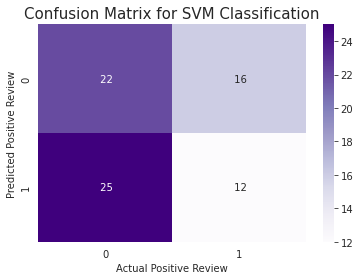

In [183]:
%%time
sv1 = SVC()

# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly'],
              'degree': [3,9],
              'max_iter': [-1, 1, 2]}

# instantiate gridsearchcv class
sv = GridSearchCV(estimator=sv1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


sv_fit = sv.fit(X_train,y_train)

# Get the estimator
best_sv = sv_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (sv1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_sv.predict(X_test)


#getting confusion matrix
y_hat_sv = best_sv.predict(X_test)
cm = confusion_matrix(y_test,y_hat_sv)

cm = confusion_matrix(y_test,y_hat_sv)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_sv),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for SVM Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
#sva = accuracy_score(y_test,y_hat_sv)
print('accuracy score = ',accuracy_score(y_test,y_hat_sv))
print(classification_report(y_test,y_hat_sv))
print("F1 Score :",round((f1_score(y_test, y_hat_sv))*100,2))


In [102]:
classifiers(tfidf_matrix, labels, 'svm')

svm


0.3614457831325301

### Logistic

In [103]:
classifiers(tfidf_matrix, labels, 'logistic')

logistic


0.3614457831325301

accuracy score =  0.49333333333333335
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        38
           1       0.49      0.54      0.51        37

    accuracy                           0.49        75
   macro avg       0.49      0.49      0.49        75
weighted avg       0.49      0.49      0.49        75

F1 Score =  0.4933333333333334
CPU times: user 1.37 s, sys: 947 ms, total: 2.32 s
Wall time: 1.28 s


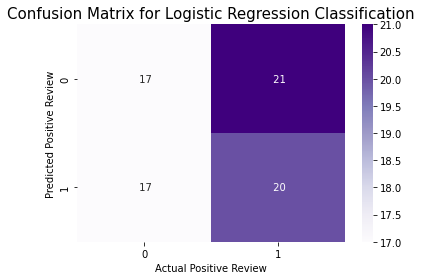

In [104]:
%%time
logr = LogisticRegression()

logr_fit = logr.fit(X_train,y_train)

# Make predictions using the unoptimized and model
predictions = (sv1.fit(X_train, y_train)).predict(X_test)
best_predictions = logr_fit.predict(X_test)


#getting confusion matrix
y_hat_logr = logr_fit.predict(X_test)
cm = confusion_matrix(y_test,y_hat_logr)

#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_logr),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Logistic Regression Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
print('accuracy score = ',accuracy_score(y_test,y_hat_logr))
print(classification_report(y_test,y_hat_logr))
print('F1 Score = ', f1_score(y_test, y_hat_logr, average='micro'))
#print("F1 Score :",round((f1_score(y_test, y_hat_logr))*100,2), average='micro')





In [105]:
classifiers(tfidf_matrix, labels, 'naive_bayes')

naive_bayes


0.3614457831325301

### Random Forest

In [106]:
X_train.shape

X_test.shape


(174, 11546)

(75, 11546)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
accuracy score =  0.5866666666666667
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        38
           1       0.59      0.54      0.56        37

    accuracy                           0.59        75
   macro avg       0.59      0.59      0.59        75
weighted avg       0.59      0.59      0.59        75

F1 Score : 56.34
CPU times: user 4.01 s, sys: 207 ms, total: 4.22 s
Wall time: 59.7 s


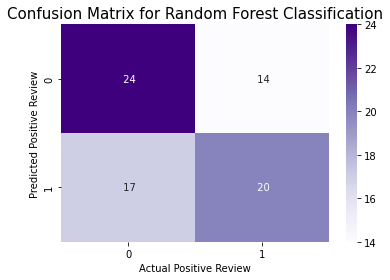

In [107]:
%%time
rf1 = RandomForestClassifier()
#(n_estimators = 60, criterion = 'entropy',random_state = 0)

# define gridsearch parameters
param_grid = {'criterion': ['entropy'],
              'n_estimators': [50],
              'max_features': ['auto', 'log2'],
              'max_depth': [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [8, 10, 12]}

# instantiate gridsearchcv class
rf = GridSearchCV(estimator=rf1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


rf_fit = rf.fit(X_train,y_train)

# Get the estimator
best_rf = rf_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (rf1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_rf.predict(X_test)

# # Report the before-and-afterscores
# print("Unoptimized model\n------")
# print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
# print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
# print("\nOptimized Model\n------")
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

#getting confusion matrix
#_pred = rf.predict(X_test)
y_hat_rf = best_rf.predict(X_test)
cm = confusion_matrix(y_test,y_hat_rf)

cm = confusion_matrix(y_test,y_hat_rf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_rf),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Random Forest Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
rfa = accuracy_score(y_test,y_hat_rf)
print('accuracy score = ',accuracy_score(y_test,y_hat_rf))
print(classification_report(y_test,y_hat_rf))
print("F1 Score :",round((f1_score(y_test, y_hat_rf))*100,2))


In [108]:
#K-fold cross validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 36.79%


In [109]:
classifiers(tfidf_matrix, labels, 'randomforest')

randomforest


0.42168674698795183

# Vectorization

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.

### Bag of Words Model 

In [184]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words= stop_words_final)
bow = bow_vectorizer.fit_transform(data['Text'])
bow.shape

(249, 3000)

####Logistic Regression

In [196]:
# Extracting train and test BoW features 
train_bow = bow[:2100,:] 
test_bow = bow[2100:,:] 

# splitting data into training and validation set 

X_train, X_test, y_train, y_test = train_test_split(train_bow, labels, test_size = 0.3, #shuffle = True,
                                                    stratify = labels,random_state = 100)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(X_train, y_train) 
prediction = lreg.predict_proba(X_test) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_test, prediction_int) # calculating f1 score for the validation set
accuracy_score(y_test, prediction_int)

LogisticRegression()

0.6588235294117648

0.6133333333333333

Text(0.5, 1.05, 'Confusion Matrix for Logistic Classification')

Text(33.0, 0.5, 'Predicted Positive Review')

Text(0.5, 15.0, 'Actual Positive Review')


accuracy score =  0.6133333333333333
              precision    recall  f1-score   support

           0       0.62      0.63      0.62        38
           1       0.61      0.59      0.60        37

    accuracy                           0.61        75
   macro avg       0.61      0.61      0.61        75
weighted avg       0.61      0.61      0.61        75

F1 Score : 60.27


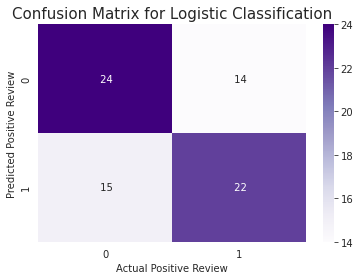

In [197]:
lreg1 = LogisticRegression(solver='lbfgs') 
# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly'],
              'degree': [3,9],
              'max_iter': [-1, 1, 2]}

# instantiate gridsearchcv class
lreg = GridSearchCV(estimator=lreg1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


logr_fit = logr.fit(X_train,y_train)

# Get the estimator
# Make predictions using the unoptimized and model
#predictions = (logr1.fit(X_train, y_train)).predict(X_test)
best_predictions = logr_fit.predict(X_test)


#getting confusion matrix
y_hat_logr = logr_fit.predict(X_test)
cm = confusion_matrix(y_test,y_hat_logr)

cm = confusion_matrix(y_test,y_hat_logr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_logr),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Logistic Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
#logra = accuracy_score(y_test,y_hat_logr)
print('\naccuracy score = ',accuracy_score(y_test,y_hat_logr))
print(classification_report(y_test,y_hat_logr))
print("F1 Score :",round((f1_score(y_test, y_hat_logr))*100,2))

#### Support Vector Classification

In [198]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train) 
prediction = svc.predict_proba(X_test) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_test, prediction_int)

0.6607142857142857

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Text(0.5, 1.05, 'Confusion Matrix for SVM Classification')

Text(33.0, 0.5, 'Predicted Positive Review')

Text(0.5, 15.0, 'Actual Positive Review')


accuracy score =  0.6266666666666667
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.62      0.62      0.62        37

    accuracy                           0.63        75
   macro avg       0.63      0.63      0.63        75
weighted avg       0.63      0.63      0.63        75

F1 Score : 62.16


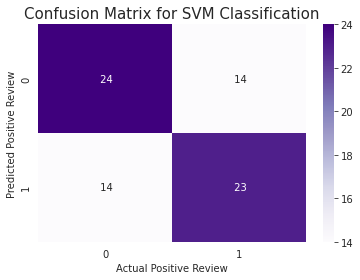

In [199]:
sv1 = SVC()

# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly'],
              'degree': [3,9],
              'max_iter': [-1, 1, 2]}

# instantiate gridsearchcv class
sv = GridSearchCV(estimator=sv1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


sv_fit = sv.fit(X_train,y_train)

# Get the estimator
best_sv = sv_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (sv1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_sv.predict(X_test)


#getting confusion matrix
y_hat_sv = best_sv.predict(X_test)
cm = confusion_matrix(y_test,y_hat_sv)

cm = confusion_matrix(y_test,y_hat_sv)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_sv),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for SVM Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
#sva = accuracy_score(y_test,y_hat_sv)
print('\naccuracy score = ',accuracy_score(y_test,y_hat_sv))
print(classification_report(y_test,y_hat_sv))
print("F1 Score :",round((f1_score(y_test, y_hat_sv))*100,2))

In [201]:
accuracy_score(y_test, prediction_int)

0.49333333333333335

### Word2vec Model

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
tokenized_tweet = data['Text'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(data['processed_text']), epochs=20)

(2831495, 3994900)

In [203]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [204]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(249, 200)

####Logistic Regression

In [205]:
# splitting data into training and validation set 
X_train, X_test, y_train, y_test = train_test_split(wordvec_df, labels, random_state=42, test_size=0.3)

# lreg.fit(X_train, y_train) 

# prediction = lreg.predict_proba(X_test)

# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)

# f1_score(y_test, prediction_int)

Text(0.5, 1.05, 'Confusion Matrix for Logistic Classification')

Text(33.0, 0.5, 'Predicted Positive Review')

Text(0.5, 15.0, 'Actual Positive Review')


accuracy score =  0.4266666666666667
              precision    recall  f1-score   support

           0       0.86      0.12      0.22        48
           1       0.38      0.96      0.55        27

    accuracy                           0.43        75
   macro avg       0.62      0.54      0.38        75
weighted avg       0.69      0.43      0.34        75

F1 Score : 54.74


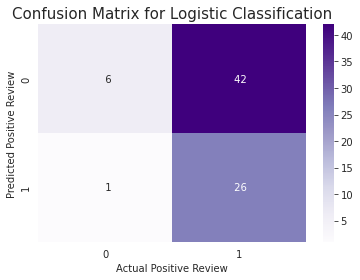

In [206]:
lreg1 = LogisticRegression(solver='lbfgs') 
# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly'],
              'degree': [3,9],
              'max_iter': [-1, 1, 2]}

# instantiate gridsearchcv class
lreg = GridSearchCV(estimator=lreg1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


logr_fit = logr.fit(X_train,y_train)

# Get the estimator
# Make predictions using the unoptimized and model
#predictions = (logr1.fit(X_train, y_train)).predict(X_test)
best_predictions = logr_fit.predict(X_test)


#getting confusion matrix
y_hat_logr = logr_fit.predict(X_test)
cm = confusion_matrix(y_test,y_hat_logr)

cm = confusion_matrix(y_test,y_hat_logr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_logr),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Logistic Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
#logra = accuracy_score(y_test,y_hat_logr)
print('\naccuracy score = ',accuracy_score(y_test,y_hat_logr))
print(classification_report(y_test,y_hat_logr))
print("F1 Score :",round((f1_score(y_test, y_hat_logr))*100,2))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Text(0.5, 1.05, 'Confusion Matrix for SVM Classification')

Text(33.0, 0.5, 'Predicted Positive Review')

Text(0.5, 15.0, 'Actual Positive Review')


accuracy score =  0.44
              precision    recall  f1-score   support

           0       0.71      0.21      0.32        48
           1       0.38      0.85      0.52        27

    accuracy                           0.44        75
   macro avg       0.55      0.53      0.42        75
weighted avg       0.59      0.44      0.39        75

F1 Score : 52.27


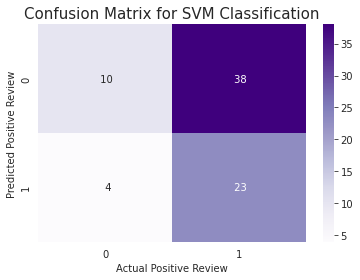

In [207]:
sv1 = SVC()

# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly'],
              'degree': [3,9],
              'max_iter': [-1, 1, 2]}

# instantiate gridsearchcv class
sv = GridSearchCV(estimator=sv1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


sv_fit = sv.fit(X_train,y_train)

# Get the estimator
best_sv = sv_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (sv1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_sv.predict(X_test)


#getting confusion matrix
y_hat_sv = best_sv.predict(X_test)
cm = confusion_matrix(y_test,y_hat_sv)

cm = confusion_matrix(y_test,y_hat_sv)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_sv),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for SVM Classification', y=1.05, size=15)
plt.ylabel('Predicted Positive Review')
plt.xlabel('Actual Positive Review')

#checking accuracy
#sva = accuracy_score(y_test,y_hat_sv)
print('\naccuracy score = ',accuracy_score(y_test,y_hat_sv))
print(classification_report(y_test,y_hat_sv))
print("F1 Score :",round((f1_score(y_test, y_hat_sv))*100,2))

In [119]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train) 
prediction = svc.predict_proba(X_test) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_test, prediction_int)

0.5454545454545454

#### Scaling

In [120]:
X_train, X_test, y_train, y_test = train_test_split(wordvec_df, labels, test_size=0.2, random_state=42)
scaler = RobustScaler()
scaler.fit(X_train.fillna(0))

RobustScaler()

In [121]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1))

In [122]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape
X_test_selected.shape

(199, 89)

(50, 89)

In [123]:
model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
model.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [124]:
predictions = model.predict(X_test_selected)
acc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
recall = recall_score(y_test, predictions)
prec = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [125]:
acc, recall, prec, f1
cm

(0.5, 0.7777777777777778, 0.4, 0.5283018867924528)

array([[11, 21],
       [ 4, 14]])

In [126]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(X_train, y_train) 
prediction = xgb.predict(X_test)
f1_score(y_test, prediction)

0.5306122448979592

In [127]:
accy = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test, prediction)
recall = recall_score(y_test, prediction)
pr = precision_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

In [128]:
accy,cm,recall,pr,f1

(0.54, array([[14, 18],
        [ 5, 13]]), 0.7222222222222222, 0.41935483870967744, 0.5306122448979592)

In [129]:
data.head(5)
data['Genre of Movie'].unique()

Doc_ID         DSI_Title                                               Text Submission File Name Student Name Genre of Movie Review Type (pos or neg) Movie Title                                     processed_text
0       0  HAG_Doc1_Frozen2  Parents, you can breathe a sigh of relief. Fro...     HAG_Doc1_Frozen2          HAG         Comedy                 Positive    Frozen_2  [parent, breath, relief, frozen, showstopp, un...
1       1  HAG_Doc2_Frozen2  Theyre back  the first Disney princesses to pe...     HAG_Doc2_Frozen2          HAG         Comedy                 Positive    Frozen_2  [first, disney, princess, persuad, boxoffic, h...
2       2  HAG_Doc3_Frozen2  Released in 2013 to a record-scorching $1.29 b...     HAG_Doc3_Frozen2          HAG         Comedy                 Positive    Frozen_2  [releas, recordscorch, billion, frozen, disney...
3       3  HAG_Doc4_Frozen2  After the colossal success of Frozen, Disneys ...     HAG_Doc4_Frozen2          HAG         Comedy                 Positive    Frozen_2  [coloss, success, frozen, disney, princess, bl...
4       4  HAG_Doc5_Frozen2  Animated adventure featuring the voices of Idi...     HAG_Doc5_Frozen2          HAG         Comedy                 Positive    Frozen_2  [anim, adventur, featur, voic, idina, menzel, ...

array(['Comedy', 'Action', 'Sci_Fi', 'Horror', 'Drama'], dtype=object)

In [130]:
horror = data [data['Genre of Movie'] == 'Horror']
horror.to_csv('horror_A5.csv')

In [131]:
horror['Movie Title'].value_counts

<bound method IndexOpsMixin.value_counts of 140                               Hereditary
141                               Hereditary
142                               Hereditary
143                               Hereditary
144                               Hereditary
145                               Hereditary
146                               Hereditary
147                               Hereditary
148                               Hereditary
149                               Hereditary
150    The_Conjuring_The_Devil_Made_Me_Do_It
151    The_Conjuring_The_Devil_Made_Me_Do_It
152    The_Conjuring_The_Devil_Made_Me_Do_It
153    The_Conjuring_The_Devil_Made_Me_Do_It
154    The_Conjuring_The_Devil_Made_Me_Do_It
155    The_Conjuring_The_Devil_Made_Me_Do_It
156    The_Conjuring_The_Devil_Made_Me_Do_It
157    The_Conjuring_The_Devil_Made_Me_Do_It
158    The_Conjuring_The_Devil_Made_Me_Do_It
159    The_Conjuring_The_Devil_Made_Me_Do_It
160                                  Us_2019
161        

In [132]:
tfidf_matrix.to_csv('tfidf_A5.csv')

In [133]:
conjuring = data [data['Movie Title'] == 'The_Conjuring_The_Devil_Made_Me_Do_It']
conjuring.to_csv('conjuring.csv')

In [134]:
Interstellar = data [data['Movie Title'] == 'Interstellar']
Interstellar.to_csv('Interstellar.csv')

In [135]:
data['category_id'] = data['Genre of Movie'].factorize()[0]
category_id_df = data[['Genre of Movie', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genre of Movie']].values)
data.head(20)

Doc_ID             DSI_Title                                               Text  Submission File Name Student Name Genre of Movie Review Type (pos or neg)   Movie Title                                     processed_text  category_id
0        0      HAG_Doc1_Frozen2  Parents, you can breathe a sigh of relief. Fro...      HAG_Doc1_Frozen2          HAG         Comedy                 Positive      Frozen_2  [parent, breath, relief, frozen, showstopp, un...            0
1        1      HAG_Doc2_Frozen2  Theyre back  the first Disney princesses to pe...      HAG_Doc2_Frozen2          HAG         Comedy                 Positive      Frozen_2  [first, disney, princess, persuad, boxoffic, h...            0
2        2      HAG_Doc3_Frozen2  Released in 2013 to a record-scorching $1.29 b...      HAG_Doc3_Frozen2          HAG         Comedy                 Positive      Frozen_2  [releas, recordscorch, billion, frozen, disney...            0
3        3      HAG_Doc4_Frozen2  After the colossal success of Frozen, Disneys ...      HAG_Doc4_Frozen2          HAG         Comedy                 Positive      Frozen_2  [coloss, success, frozen, disney, princess, bl...            0
4        4      HAG_Doc5_Frozen2  Animated adventure featuring the voices of Idi...      HAG_Doc5_Frozen2          HAG         Comedy                 Positive      Frozen_2  [anim, adventur, featur, voic, idina, menzel, ...            0
5        5      HAG_Doc6_Frozen2  Three weeks after Donald Trump was elected pre...      HAG_Doc6_Frozen2          HAG         Comedy                 Negative      Frozen_2  [three, week, donald, trump, elect, presid, di...            0
6        6      HAG_Doc7_Frozen2  We have seen it thousands of times in our live...      HAG_Doc7_Frozen2          HAG         Comedy                 Negative      Frozen_2  [thousand, time, live, never, menac, speak, di...            0
7        7      HAG_Doc8_Frozen2  Two thoughts occurred while watching the seque...      HAG_Doc8_Frozen2          HAG         Comedy                 Negative      Frozen_2  [thought, occur, watch, sequel, frozen, first,...            0
8        8      HAG_Doc9_Frozen2  Once upon a time, Disney sent its subpar seque...      HAG_Doc9_Frozen2          HAG         Comedy                 Negative      Frozen_2  [disney, subpar, sequel, kingdom, straighttovi...            0
9        9     HAG_Doc10_Frozen2  Elsa does not get a girlfriend in Frozen II, w...     HAG_Doc10_Frozen2          HAG         Comedy                 Negative      Frozen_2  [girlfriend, frozen, condol, plead, disney, su...            0
10      10   RIA_Doc1_SpiderMan3  Now that summer movies have become events, it'...   RIA_Doc1_SpiderMan3          RIA         Action                 Positive  Spider_Man_3  [summer, becom, event, get, harder, harder, di...            1
11      11   RIA_Doc2_SpiderMan3  History has proven that movie sequels rarely e...   RIA_Doc2_SpiderMan3          RIA         Action                 Positive  Spider_Man_3  [histori, proven, sequel, rare, exceed, origin...            1
12      12   RIA_Doc3_SpiderMan3  After two movies of reluctant hero Peter Parke...   RIA_Doc3_SpiderMan3          RIA         Action                 Positive  Spider_Man_3  [reluct, peter, parker, learn, great, power, c...            1
13      13   RIA_Doc4_SpiderMan3  You’ve probably seen Spider-Man’s new black su...   RIA_Doc4_SpiderMan3          RIA         Action                 Positive  Spider_Man_3  [probabl, black, costum, guarante, arriv, door...            1
14      14   RIA_Doc5_SpiderMan3  Spider-Man 3 director Sam Raimi has had a diff...   RIA_Doc5_SpiderMan3          RIA         Action                 Positive  Spider_Man_3  [spiderman, director, raimi, difficult, follow...            1
15      15   RIA_Doc6_SpiderMan3  Doubling back to pick up some titles I missed ...   RIA_Doc6_SpiderMan3          RIA         Action                 Negative  Spider_Man_3  [doubl, titl, miss, great, fail, spide

In [136]:
#from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words= stop_words_final)
features = Tfidf.fit_transform(data.Text).toarray()
#features = tfidf_matrix
labels = data.category_id
features.shape

(249, 4749)

In [137]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for Movie_Title, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(Tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Movie_Title))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Action':
  . Most correlated unigrams:
. spider
. depp
. bond
. racer
. harry
  . Most correlated bigrams:
. mission impossible
. sudden impact
. dirty harry
. speed racer
. spider man
# 'Comedy':
  . Most correlated unigrams:
. davidson
. mirabel
. murray
. cruella
. disney
  . Most correlated bigrams:
. pete davidson
. bill murray
. king staten
. groundhog day
. staten island
# 'Drama':
  . Most correlated unigrams:
. matt
. damon
. mars
. martian
. watney
  . Most correlated bigrams:
. jeff daniels
. drew goddard
. andy weir
. mark watney
. matt damon
# 'Horror':
  . Most correlated unigrams:
. scares
. ingvar
. peele
. lamb
. horror
  . Most correlated bigrams:
. ari aster
. naomi watts
. conjuring devil
. ed lorraine
. devil made
# 'Sci_Fi':
  . Most correlated unigrams:
. del
. kaiju
. guardians
. rim
. aliens
  . Most correlated bigrams:
. amy adams
. science fiction
. guardians galaxy
. del toro
. pacific rim


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Movie Title'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

LinearSVC()

Text(68.09375, 0.5, 'Actual')

Text(0.5, 68.09375, 'Predicted')

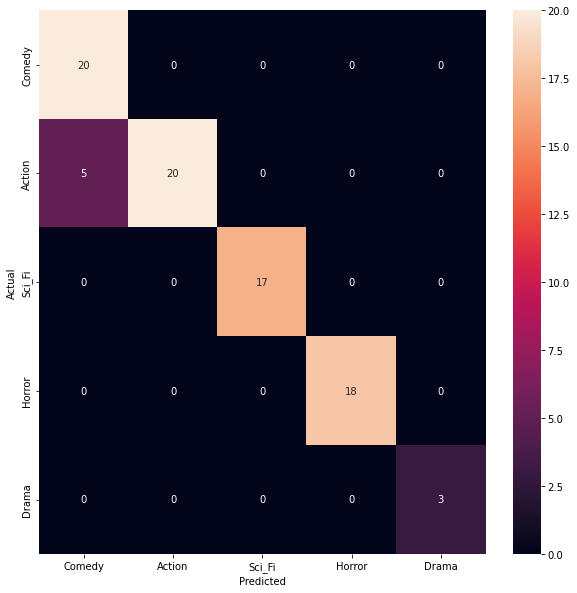

In [139]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['Genre of Movie'].values, yticklabels=category_id_df['Genre of Movie'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [140]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=data['Genre of Movie'].unique()))

              precision    recall  f1-score   support

      Comedy       0.80      1.00      0.89        20
      Action       1.00      0.80      0.89        25
      Sci_Fi       1.00      1.00      1.00        17
      Horror       1.00      1.00      1.00        18
       Drama       1.00      1.00      1.00         3

    accuracy                           0.94        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.95      0.94      0.94        83



### Polarity using Textblob

In [141]:
data['processed_text'].head()

0    [parent, breath, relief, frozen, showstopp, un...
1    [first, disney, princess, persuad, boxoffic, h...
2    [releas, recordscorch, billion, frozen, disney...
3    [coloss, success, frozen, disney, princess, bl...
4    [anim, adventur, featur, voic, idina, menzel, ...
Name: processed_text, dtype: object

<Figure size 720x720 with 0 Axes>

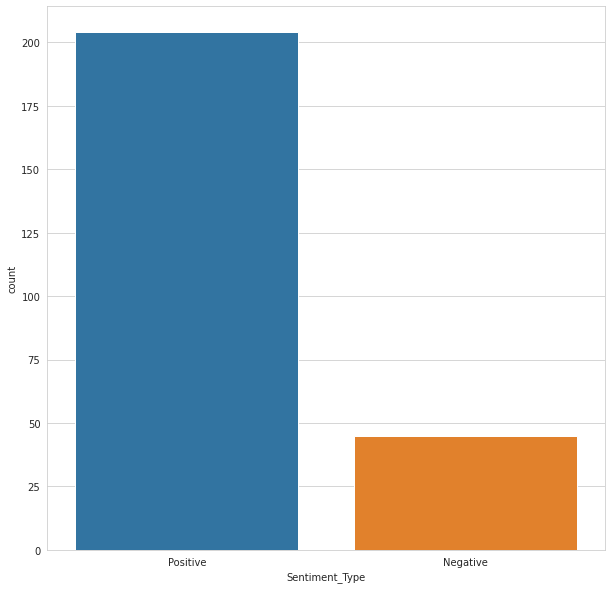

In [142]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=data['processed_text'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

In [143]:
data['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

In [144]:
pd.crosstab(data['Review Type (pos or neg)'], data['Sentiment_Type'], dropna=False)

Sentiment_Type            Negative  Positive
Review Type (pos or neg)                    
Negative                        25       100
Positive                        20       104

#References

https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
